# COMP3211 Assigment2 - Image Segmentation using K-Means

## Problem 1: K-means based Unsupservised Segmentation

### Importing the libraries and papreprocessing the data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd "drive/MyDrive/COMP3211/Assigment2_副本"

/content/drive/MyDrive/COMP3211/Assigment2_副本


(330, 500, 3)


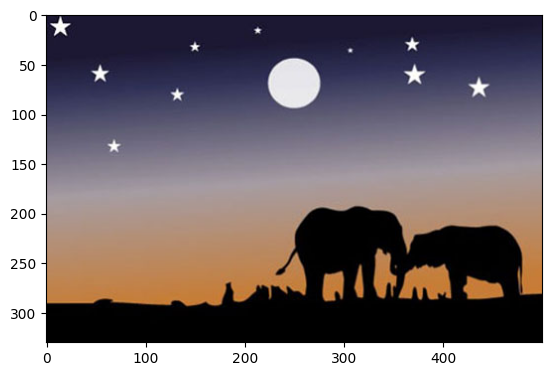

(165000, 3)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape

print(im.shape)
plt.imshow(im) # as RGB Format
plt.show()

# Flatten Each channel of the Image
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

### Q1. Implement your K-Means Clustering

In [ ]:
def k_means_algorithm(n_clusters: int, all_pixels: np.ndarray):
    """
    Applies K-Means clustering on the provided pixel data to segment an image based on color attributes.

    Parameters:
    - n_clusters (int): The number of clusters or segments desired in the output.
    - all_pixels (np.ndarray): A 2D numpy array of shape (h x w, 3). Each row represents a pixel with its RGB values.

    Returns:
    - n_clusters: A numpy array of shape (n_clusters, 3) representing the cluster centroids in RGB format.
    - labels: A numpy array of shape (h x w) where each value is an integer label from 0 to (n_clusters-1), indicating the cluster to which each pixel belongs.
    """
    ######################## Your Implementation #############################
    # Initialize random centroid
    loop = True
    centroids = (np.random.rand(n_clusters,all_pixels.shape[1]))
    #print(centroids)
    while loop:
        for i in range(n_clusters):
            dist = np.linalg.norm(centroids[i]-all_pixels,axis = 1)
            #print("shape of dist", dist.shape)
            if i == 0:
                Dist = dist
            else:
                Dist = np.column_stack((Dist,dist))

        #print("Dist's dimension = ", Dist.shape)
        labels = np.argmin(Dist, axis = 1)
        #print("Label shape",labels.shape)
        new_centroids = np.empty([n_clusters,all_pixels.shape[1]])
        for i in range(n_clusters):
            if np.sum(labels==i) == 0:
                new_centroids[i] = centroids[i]
            else:
                new_centroids[i] = np.mean(all_pixels[labels==i],axis =0)

        #print("new_centroids.shape", new_centroids.shape)
        if np.sum(np.linalg.norm(new_centroids-centroids, axis=1))<1e-3: #1e-3 by pdf
            loop = False
            n_clusters = new_centroids
        else:
            centroids = new_centroids

    ######################## End of Your Implementation ######################
    return n_clusters, labels

dominant_colors = 4
centers, labels = k_means_algorithm(dominant_colors, all_pixels)

# Convert to Integer format
centers = np.array(centers, dtype='uint8')
print(centers)

[[ 99  95 118]
 [ 38  35  64]
 [  1   0   1]
 [174 145 128]]


### Q2.1 What kind of color are cluster centers presented?

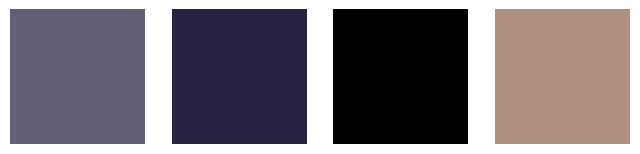

In [ ]:
def analysis_colors_and_plot(centers: np.ndarray):
    """
    Analyzes the RGB values of the cluster centers and provides a description of the colors.
    Additionally, it plots the colors for a visual representation.

    Parameters:
    - centers (np.ndarray): A 2D numpy array of shape (n_clusters, 3) representing the cluster centroids in RGB format.

    Returns:
    - colors: A list of color(maybe int tuple) where each is a description of the color represented by the corresponding cluster center.
    """
    colors = []
    plt.figure(0,figsize=(8,2))

    # Storing info in color array
    colors = []
    i = 1

    for each_col in centers:
        plt.subplot(1,centers.shape[0],i)
        plt.axis("off")
        i+=1

        colors.append(each_col)

        # Color Swatch
        a = np.zeros((100,100,3),dtype='uint8')
        a[:,:,:] = each_col #each_col.shape = 3
        plt.imshow(a)

    plt.show()
    return colors

colors = analysis_colors_and_plot(centers)

### Show the segmented images

In [ ]:
# Iterate over the image
def match_color_to_all_pixels(colors: list, labels: np.ndarray, new_img: np.ndarray, original_shape: tuple) -> np.ndarray:
    """
    Maps the cluster centroids (colors) to the original image pixels based on the labels.

    Parameters:
    - colors (list): A 2D numpy array of shape (n_clusters, 3) representing the cluster centroids in RGB format.
    - labels (np.ndarray): A 1D numpy array of shape (h x w) where each value is an integer label from 0 to (n_clusters-1), indicating the cluster to which each pixel belongs.
    - new_img (np.ndarray): A numpy array to store the resultant segmented image. It should have the same shape as the original image.
    - original_shape (tuple): A tuple representing the original shape of the image, i.e., (h, w, 3).

    Returns:
    - np.ndarray: The resultant segmented image.
    """

    for ix in range(new_img.shape[0]):
        new_img[ix] = colors[labels[ix]]

    new_img = new_img.reshape((original_shape))

    return new_img

width, height, chanles = im.shape
new_img = np.zeros((width*height,chanles),dtype='uint8')
print(new_img.shape)

new_img = match_color_to_all_pixels(colors, labels, new_img, original_shape)

plt.imshow(new_img)
plt.show()



(165000, 3)


ValueError: ignored

### Q2.2 Please show the segmented images for different values of K = 2, 4, 6, 8, 10, draw in one line

(2, 3)
(4, 3)
(6, 3)
(8, 3)
(10, 3)


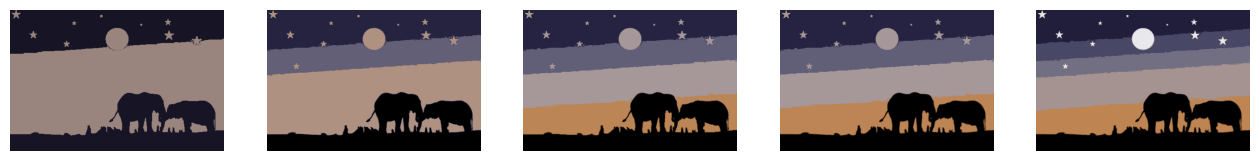

In [ ]:
######################## Your Implementation #############################
# This may need change as for one line :  plt.subplot(1,centers.shape[0],i)
i = 1
plt.figure(0,figsize=(16,4))
for x in [2,4,6,8,10]:
    centers, labels = k_means_algorithm(x, all_pixels)
    print(centers.shape)
    colors = centers[:]
    new_img = np.zeros((width*height,chanles),dtype='uint8')
    new_img = match_color_to_all_pixels(colors, labels, new_img, original_shape)
    #print(new_img.shape)
    #print(i)
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(new_img)
    i +=1


plt.show()

######################## End of Your Implementation ######################

### Example for features and segmentation via FCN

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


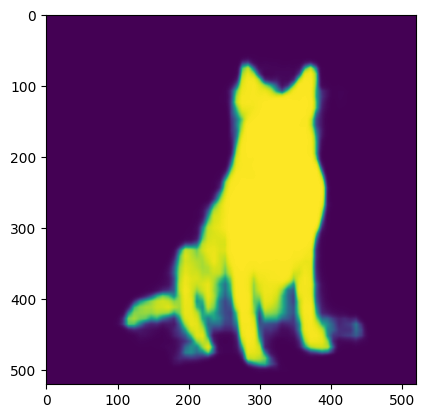

In [ ]:
from torchvision.io.image import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt

img = read_image("./dog.jpg")

# Step 1: Initialize model with the best available weights
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and visualize the prediction
prediction = model(batch)["out"]

normalized_masks = prediction.softmax(dim=1)
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
mask = normalized_masks[0, class_to_idx["dog"]]
mask_img = to_pil_image(mask)

plt.imshow(mask_img)

### Q3. Segment image via features from FCN and K-means, set K = 2, 4, 6, 8

In [ ]:
from torch.nn import functional as F
import numpy as np

orginal_features = model.backbone(batch)["out"]
features = F.interpolate(orginal_features, size=img.shape[-2:], mode="bilinear", align_corners=False)
features = (features.squeeze(0).reshape((2048, -1))).permute(1, 0).detach().numpy() # Now, features is of shape (H*W, C), where C is learned features instead of colors

######################## Your Implementation #############################
centers, labels = k_means_algorithm(8, features)
centers = np.array(centers)
print(centers)
print(labels)
######################## End of Your Implementation ######################

[[1.68624297e-01 4.52444665e-02 8.23199302e-02 ... 1.20803162e-01
  1.95400178e-01 1.48967311e-01]
 [9.32743922e-02 1.19005911e-01 6.01890795e-02 ... 6.96799830e-02
  1.17598824e-01 6.23514690e-02]
 [1.03295469e+00 1.21079432e-02 1.13885629e+00 ... 8.10388625e-01
  1.57390684e-01 7.83639699e-02]
 ...
 [3.54322147e+00 1.57096394e-04 4.65560770e+00 ... 2.89260125e+00
  1.46541530e-02 7.83927646e-03]
 [3.44102085e-01 1.19008809e-01 6.33272529e-02 ... 1.41501604e-02
  7.49917477e-02 9.55649689e-02]
 [7.40910579e-02 4.55498165e-01 5.34506002e-01 ... 8.76365104e-01
  3.26252804e-01 5.35711462e-01]]
[3 3 3 ... 4 4 4]


Feature shape =  (51529, 2048)
torch.Size([3, 227, 227])
227
227
3


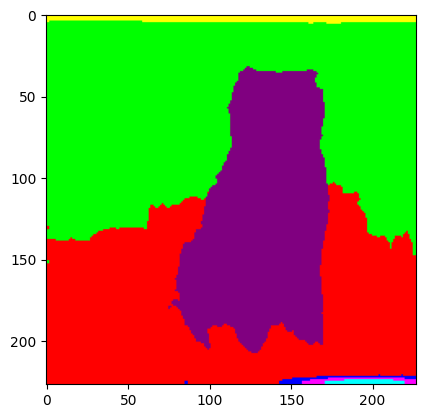

In [ ]:
print("Feature shape = ", features.shape)
chanles, height, width  = img.shape
print(img.shape)
print(height)
print(width)
print(chanles)
original_shape = (height, width, chanles)

new_img = np.zeros((width*height,chanles), dtype='uint8')

colors = [(255, 0, 0),
          (0, 255, 0),
          (0, 0, 255),
          (255, 255, 0),
          (255, 0, 255),
          (0, 255, 255),
          (128, 0, 128),
          (255, 165, 0)]

new_img = match_color_to_all_pixels(colors, labels, new_img, original_shape)
new_img = new_img.reshape((height, width, chanles))

plt.imshow(new_img)
plt.show()

## Problem 2: A* for Maze Searching (extra program file required)

In [ ]:
import heapq
import numpy as np
#Heuristic function
def h1(x,y):
  return 0

def h2(x,y,maze):
  #This function require the existence of maze
  maze_np = np.asarray(maze)
  height, width = maze_np.shape
  return (height-x,width-y)
# L1 distance of current to end_pt
def h3(x,y,end_pt):
  #end_pt should be tuple
  #if (np.abs(x-end_pt[0])+np.abs(y-end_pt[1])) > (np.abs(x)+np.abs(y)):
    #return (np.abs(x-end_pt[0])+np.abs(y-end_pt[1]))
  return ((np.abs(x-end_pt[0])+np.abs(y-end_pt[1]))) ## Try Try
  #L2#1.1*np.sqrt(np.square(x-end_pt[0])+np.square(y-end_pt[1]))
  #L1#1.00001*(np.abs(x-end_pt[0])+np.abs(y-end_pt[1]))
  #Diagonal dis: max(np.abs(x-end_pt[0]),np.abs(y-end_pt[1]))

def notWall(x,y,maze):
  if maze[x][y]!=1:
    return True
  return False

def neighbors(node,maze):
  # We want to give a list of not wall node
  height = np.asarray(maze).shape[0]
  width = np.asarray(maze).shape[1]
  Possible = []
  x,y = node
  # (0,0)

  if y-1 < 0:
    Possible.append((x,y+1))
  elif y == width-1:
    Possible.append((x,y-1))
  else:
    Possible.append((x,y+1))
    Possible.append((x,y-1))

  if x-1 < 0:
    Possible.append((x+1,y))
  elif x == height-1:
    Possible.append((x-1,y))
  else:
    Possible.append((x-1,y))
    Possible.append((x+1,y))

  NotWall = [x for x in Possible if notWall(x[0],x[1],maze)]
  return NotWall

def a_star_algorithm(maze, start, goal):
    """
    Navigate through a maze using the A* algorithm.

    Parameters:
    - maze (list of lists): A 2D list representing the maze.
    - start (tuple): A tuple of (row, col) indicating the starting point.
    - goal (tuple): A tuple of (row, col) indicating the goal point.

    Returns:
    - path: A list of tuples representing the path from start to goal. Returns an empty list if no path is found.
    - nodes: A list of tuples representing the nodes explored during the search process. Returns an empty list if no path is found.
    """

    # TODO: Implement the A* algorithm here.
    # Not explored
    Open = []
    # Explored
    Closed = []
    Found = False
    # f = g((tuple)) + h((tuple))
    g_list = np.zeros_like(maze)
    parent_list = np.array(g_list, dtype=object)
    Open.append(start)
    prevnode = start
    while(Found == False):
      # If no not explored then done
      if len(Open) == 0:
        print("Nothing in open")
        return
      # Explore the least costly node
      Least = 0
      Min = np.inf
      #####
      print("Open_list has:", Open)
      #print("g_list is :", g_list)
      for i in range(len(Open)):
        x = Open[i][0]
        y = Open[i][1]
        print("Current node to check is :", Open[i])
        print("It has cost: ",g_list[x][y] + h3(x,y,goal), "with g = ", g_list[x][y], " and f = ", h3(x,y,goal))
        if Open[i] == (1,2):
          print("x is %d, y is %d"%(x,y))
          print("g_list[1][2] =", g_list[x][y])
      ###

      for i in range(len(Open)):
        x = Open[i][0]
        y = Open[i][1]
        # Using my own heuristic
        cost = g_list[x][y] + h3(x,y,goal)

        if cost < Min:
          Min = cost
          Least = i

      # Poping the one with the least f
      #print("Current Open is:", Open)
      node = Open.pop(Least)
      #print("Current Node popped is:", node)

      if node == goal:
        print("Found")
        Found = True

      #Find actual cost
      if node == start:
        cost = 0
        #print("Node is : ", node)
        #print("Type:" ,type(node[0]))
        parent_list[node[0]][node[1]] = node
        parent_node = node
      else:
        parent_node = parent_list[node[0]][node[1]] ## We should update parent node first
        #print("Node is:" , node)
        #print("Parent node is :" ,parent_node)
        cost = g_list[parent_node[0]][parent_node[1]]+1
        g_list[node[0]][node[1]] = cost


      ## We may need to revisit or review the cost (If neighbor has higher f value) i.e update g_list accordingly
      Closed.append(node)
      Verify = [x for x in neighbors(node,maze) if x not in Closed]
      #print("By neighbors for {0} are {1}".format(node,neighbors(node,maze)))
      for child in Verify:
        # We shall first check if there is parent
        if parent_list[child[0]][child[1]] != 0:
          #print("verify if parent")
          #print("Current node is :", node)
          #print("Child node is :", child)
          neighbor_parent_node = parent_list[child[0]][child[1]]
          if cost >= g_list[neighbor_parent_node[0]][neighbor_parent_node[1]]:
            g_list[child[0]][child[1]] = g_list[neighbor_parent_node[0]][neighbor_parent_node[1]] + 1
            continue
          parent_list[child[0]][child[1]] = node
          g_list[child[0]][child[1]] = g_list[node[0]][node[1]]+1
        else:
          parent_list[child[0]][child[1]] = node
          g_list[child[0]][child[1]] = g_list[node[0]][node[1]]+1
          Open.append(child)

      print("########\nThis turn the node is:", node)

      #print("Verify what in verify list", Verify)
      #print("Verify what in open list", Open)
      #print("Node in the end is: ",node)
      #print("Found is: ",Found)

    nodes = Closed
    path =[]
    path.append(goal)
    node = goal
    #print("Node before while is", node)
    #print("Final g_list is", g_list)
    #print("Final parent_list is is", parent_list)
    while(True):
      #print("parent_node before update is:", parent_node)
      parent_node = parent_list[node[0]][node[1]]
      #print("Parent node is :",parent_node)
      if node == start:
        break
      node = parent_node
      #print("node is :", node)
      path.append(node)

    path.reverse()

    return path, nodes

maze = [[0, 0, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 1, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 0, 0]]

path, nodes = a_star_algorithm(maze, (0, 0), (4, 4))
print(path)
print(nodes)

# Example usage:
# path, nodes = a_star_algorithm(maze, (0, 0), (4, 4))


Open_list has: [(0, 0)]
Current node to check is : (0, 0)
It has cost:  8.0000008 with g =  0  and f =  8.0000008
########
This turn the node is: (0, 0)
Open_list has: [(0, 1)]
Current node to check is : (0, 1)
It has cost:  8.000000700000001 with g =  1  and f =  7.0000007
########
This turn the node is: (0, 1)
Open_list has: [(1, 1)]
Current node to check is : (1, 1)
It has cost:  8.0000006 with g =  2  and f =  6.0000006
########
This turn the node is: (1, 1)
Open_list has: [(1, 2), (2, 1)]
Current node to check is : (1, 2)
It has cost:  8.0000005 with g =  3  and f =  5.0000005000000005
x is 1, y is 2
g_list[1][2] = 3
Current node to check is : (2, 1)
It has cost:  8.0000005 with g =  3  and f =  5.0000005000000005
########
This turn the node is: (1, 2)
Open_list has: [(2, 1), (1, 3)]
Current node to check is : (2, 1)
It has cost:  8.0000005 with g =  3  and f =  5.0000005000000005
Current node to check is : (1, 3)
It has cost:  8.000000400000001 with g =  4  and f =  4.0000004
###

In [ ]:
Optimal = np.asarray(maze)
for x in path:
  Optimal[x[0]][x[1]]=2

print(Optimal)

[[2 2 1 1 1]
 [1 2 2 2 1]
 [1 0 1 2 1]
 [1 0 0 2 1]
 [1 1 1 2 2]]


In [ ]:
Expand = np.asarray(maze)
for x in nodes:
  Expand[x[0]][x[1]]=3

print(Expand)

[[3 3 1 1 1]
 [1 3 3 3 1]
 [1 0 1 3 1]
 [1 0 0 3 1]
 [1 1 1 3 3]]
